# Wavelet decomposition

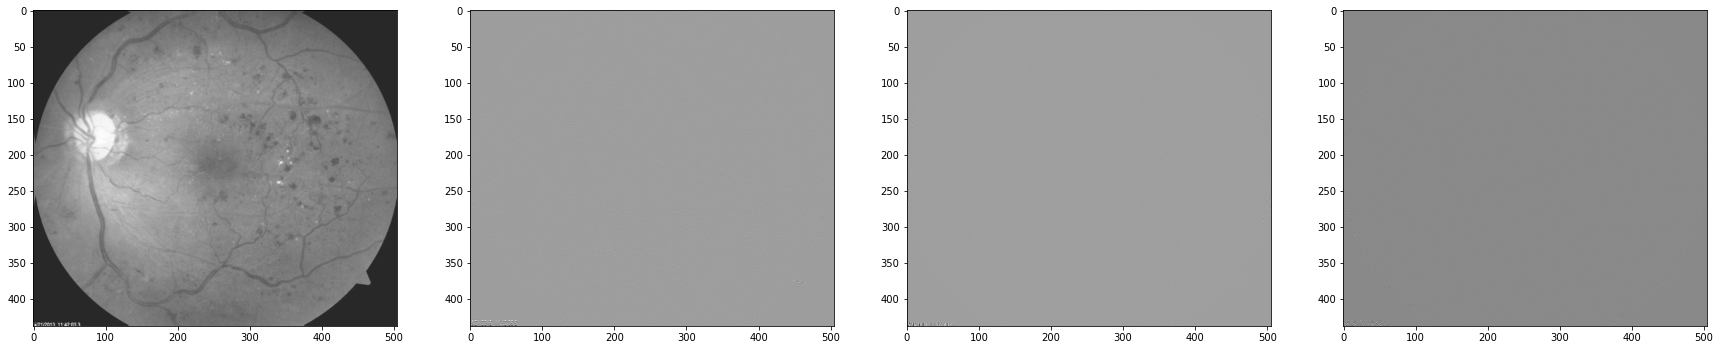

In [256]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import cv2


# Load image
#original = pywt.data.camera()
original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg',0)
# original  = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg')
# original  = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/k.jpg')
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'db5')
LL, (LH, HL, HH) = coeffs2

plt.figure(figsize=(30,20))
plt.subplot(141)
plt.imshow(LL, cmap='gray')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/approximation.png')
plt.subplot(142)
plt.imshow(LH, cmap='gray')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/horizontal.png')
plt.subplot(143)
plt.imshow(HL, cmap='gray')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/vertical.png')
plt.subplot(144)
plt.imshow(HH, cmap='gray')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/diagonal.png')

## Approximation

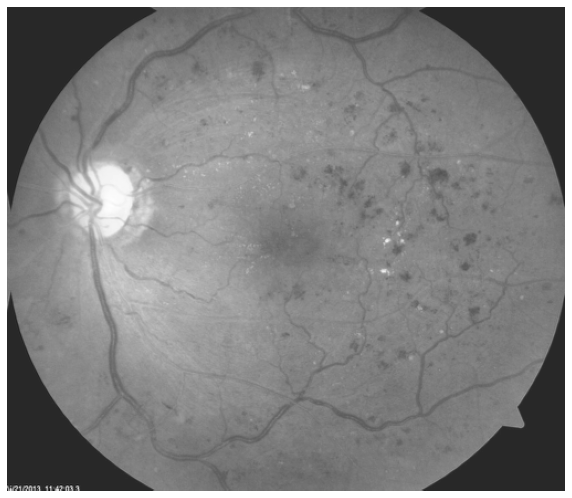

In [257]:
plt.figure(figsize=(10,10))
# plt.title('Approximation')
plt.axis('off')
plt.imshow(LL, cmap='gray')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/approximation.png')

## Horizontal

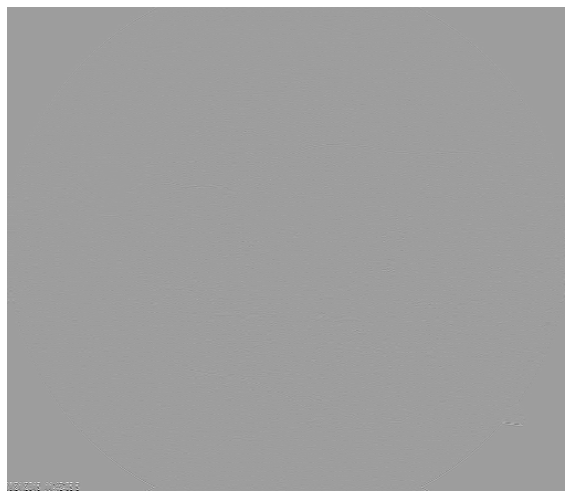

In [258]:
plt.figure(figsize=(10,10))
# plt.title('Horizontal')
plt.axis('off')
plt.imshow(LH, cmap='gray')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/horizontal.png')

## Vertical

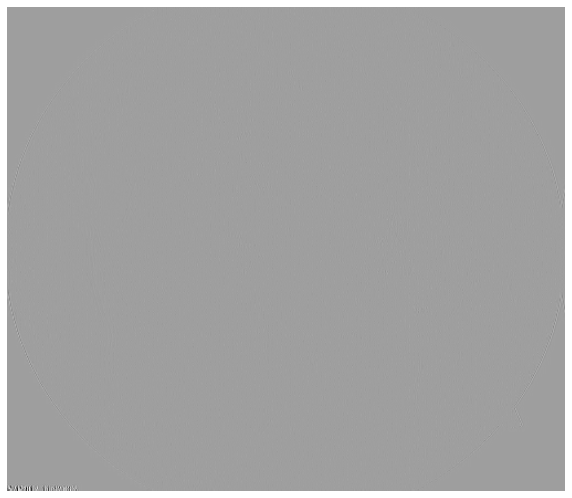

In [259]:
plt.figure(figsize=(10,10))
# plt.title('Vertical')
plt.axis('off')
plt.imshow(HL, cmap='gray')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/vertical.png')

## Diagonal

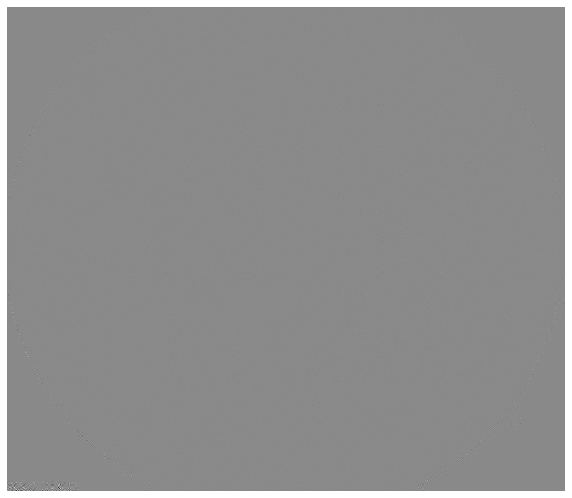

In [260]:
plt.figure(figsize=(10,10))
# plt.title('Diagonal')
plt.axis('off')
plt.imshow(HH, cmap='gray')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/diagonal.png')

In [261]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import pywt
# import pywt.data


# # Load image
# # original = pywt.data.camera()
# original  = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/k.jpg',0)
# # original  = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/k.jpg')
# # Wavelet transform of image, and plot approximation and details
# titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
# coeffs2 = pywt.dwt2(original, 'bior1.3')
# LL, (LH, HL, HH) = coeffs2
# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()

In [262]:
# plt.figure(figsize = (10,10))
# plt.axis("off")
# plt.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))
# plt.show()

In [263]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
from scipy import *
import scipy.ndimage
import skimage.filters
import sklearn.metrics

# Turn on interactive mode. Turn off with plt.ioff()
plt.ion()

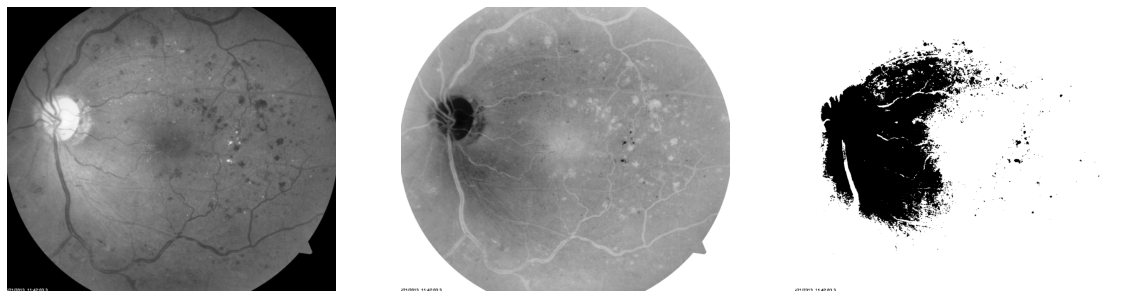

In [264]:
import cv2

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg',2)
gray = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg',0)
plt.figure(figsize = (20,20))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(gray, cmap="gray")
plt.subplot(1, 3, 2)
inverted =cv2.bitwise_not(gray)
plt.axis("off")
plt.imshow(inverted,cmap="gray")
ret, bw_img = cv2.threshold(inverted,127,255,cv2.THRESH_BINARY)
plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(bw_img,cmap="gray")



# Blood Vessel Extraction Steps

In [344]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/horizontal.png')
# image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg')

b,green_fundus,r = cv2.split(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_enhanced_green_fundus = clahe.apply(green_fundus)

	# applying alternate sequential filtering (3 times closing opening)
r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
f5 = clahe.apply(f4)

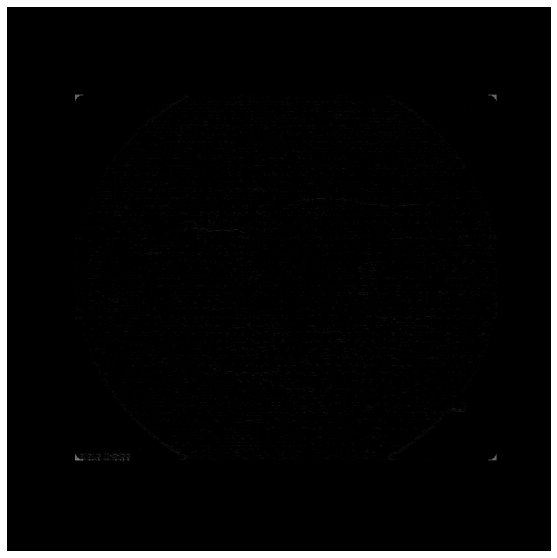

In [345]:
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(f5, cmap= 'gray')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/extracted/approximation_bloodvessel.png')

In [346]:
# edged = cv2.Canny(f5, 30, 200)
# contours, hierarchy = cv2.findContours(edged, 
#     cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(edged, contours, -1, (0, 255, 0))
# plt.figure(figsize = (10,10))
# plt.imshow(edged, cmap = 'gray')

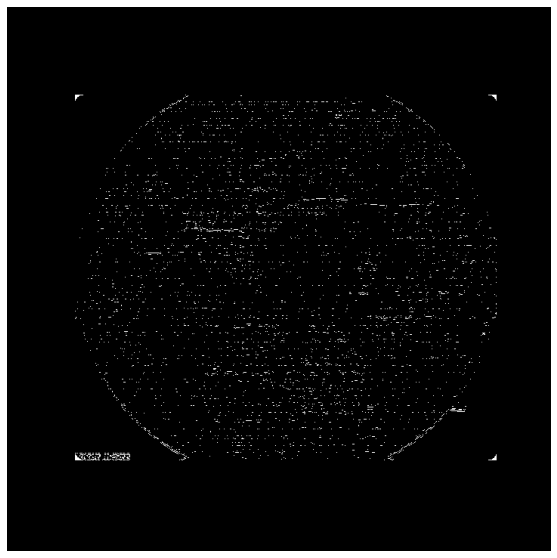

In [347]:
ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(f6, cmap = 'gray')

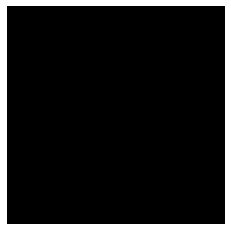

In [348]:

mask = np.ones(f5.shape[:2], dtype="uint8") * 255	
plt.axis("off")
plt.imshow(mask, cmap = 'gray')

In [349]:
contours, hierarchy = cv2.findContours(f5,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE,)

In [350]:
for cnt in contours:
	if cv2.contourArea(cnt) <= 200:
		cv2.drawContours(mask, [cnt], -1, 0, -1)			
im = cv2.bitwise_and(f5, f5, mask=mask)
ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)			
newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	

In [351]:
print("Number of Contours is: " + str(len(contours)))

Number of Contours is: 1


In [352]:
	fundus_eroded = cv2.bitwise_not(newfin)	
	xmask = np.ones(fundus_eroded.shape[:2], dtype="uint8") * 255
	xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE )

In [353]:
print("Number of Contours is: " + str(len(xcontours)))

Number of Contours is: 2259


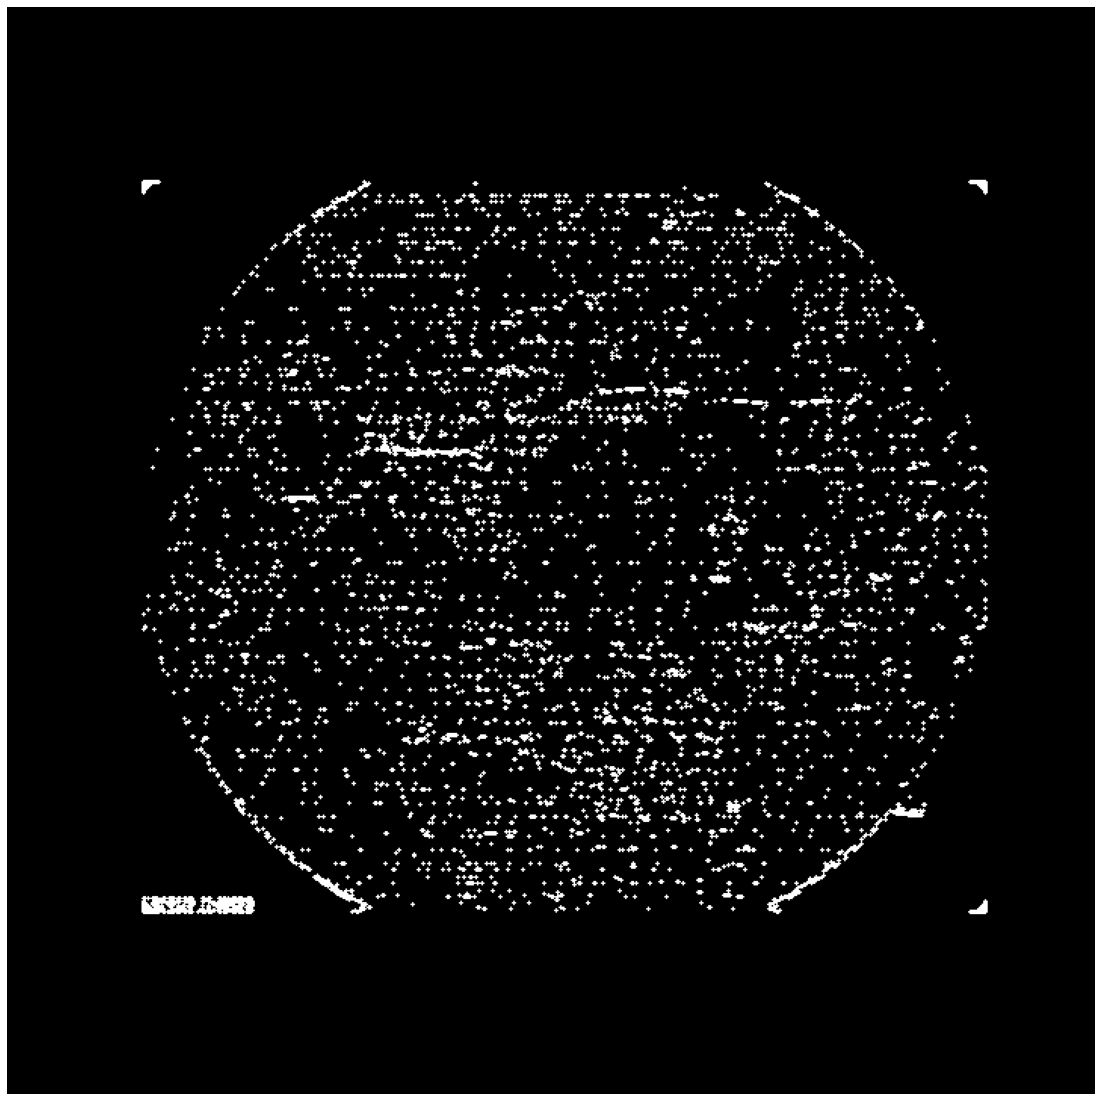

In [354]:
conter = cv2.drawContours(fundus_eroded, xcontours, 0, (0, 230, 255), 6)
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(conter, cmap = 'gray')

In [355]:
for cnt in xcontours:
  shape = 'unidentified'
  peri = cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt, 0.04 * peri, False,)
  if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 or cv2.contourArea(cnt) >= 100:
    shape = 'circle'
  elif (shape == 'circle'):
    cv2.drawContours(xmask, [cnt], -1, 0, -1)

In [356]:
finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
blood_vessels = cv2.bitwise_not(finimage)

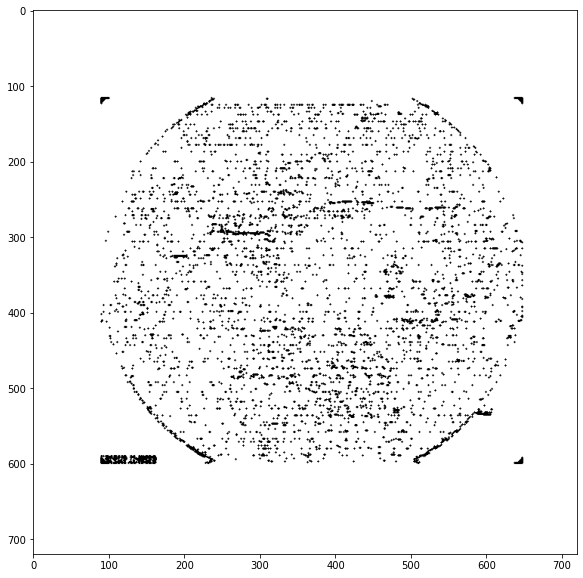

In [357]:
plt.figure(figsize = (10,10))
plt.imshow(blood_vessels, cmap= 'gray')

In [358]:
for cnt in xcontours:
  shape = 'unidentified'
  peri = cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt, 0.04 * peri, False,)
  if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 or cv2.contourArea(cnt) >= 100:
    shape = 'circle'
  elif (shape == 'circle'):
    cv2.drawContours(blood_vessels, [cnt[4]], -1, (0,0,255))

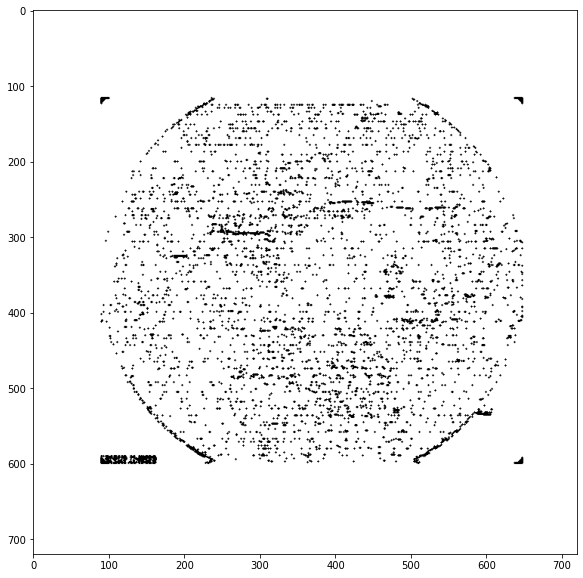

In [359]:
plt.figure(figsize = (10,10))
plt.imshow(blood_vessels, cmap= 'gray')

# Blood Vessel Extraction In one function

In [281]:
import cv2
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
def extract_bv(image):
  # image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg')
  # image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg')
  b,green_fundus,r = cv2.split(image)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  contrast_enhanced_green_fundus = clahe.apply(green_fundus)

	# applying alternate sequential filtering (3 times closing opening)
  r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
  R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
  r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
  R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
  r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
  R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
  f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
  f5 = clahe.apply(f4)
  ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
  ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
  mask = np.ones(f5.shape[:2], dtype="uint8") * 255	
  contours, hierarchy = cv2.findContours(f5,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE,)
  for cnt in contours:
    if cv2.contourArea(cnt) <= 200:
      cv2.drawContours(mask, [cnt], -1, 0, -1)			
  im = cv2.bitwise_and(f5, f5, mask=mask)
  ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)			
  newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	
  fundus_eroded = cv2.bitwise_not(newfin)	
  xmask = np.ones(fundus_eroded.shape[:2], dtype="uint8") * 255
  xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
  for cnt in xcontours:
    shape = 'unidentified'
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)
    if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
      shape = 'circle'
    elif (shape == 'circle'):
      cv2.drawContours(xmask, [cnt], -1, 0, -1)
  finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
  blood_vessels = cv2.bitwise_not(finimage)
  return blood_vessels

if __name__ == "__main__":	
	pathFolder = "/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/wavelet/"
	filesArray = [x for x in os.listdir(pathFolder) if os.path.isfile(os.path.join(pathFolder,x))]
	destinationFolder = "/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/extracted/wavelet_extracted/"
	if not os.path.exists(destinationFolder):
		os.mkdir(destinationFolder)
	for file_name in filesArray:
		file_name_no_extension = os.path.splitext(file_name)[0]
		fundus = cv2.imread(pathFolder+'/'+file_name)		
		bloodvessel = extract_bv(fundus)
		cv2.imwrite(destinationFolder+file_name_no_extension+"_bloodvessel.png",bloodvessel)

# Contours

Number of Contours found = 54


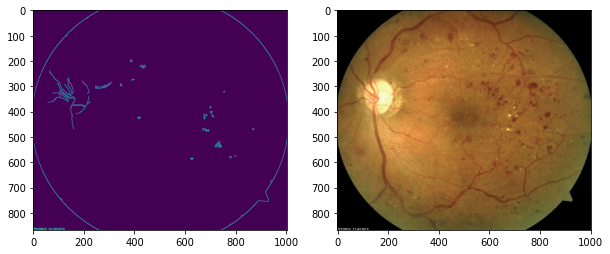

In [282]:

import cv2
import numpy as np
  
# # Let's load a simple image with 3 black squares
image = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg')

# # Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# # Find Canny edges
edged = cv2.Canny(gray, 30, 200)
#
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
# cv2.imshow('Canny Edges After Contouring', edged)


  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(blood_vessels, contours, -1, (255, 0, 0))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(edged) 
plt.subplot(122)
plt.imshow(image, cmap= 'gray')

Number of Contours found = 69


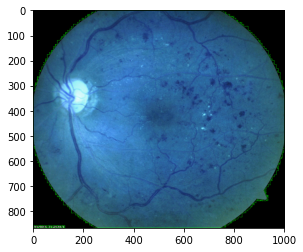

In [283]:

import cv2
import numpy as np
  
# Let's load a simple image with 3 black squares
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/wavelet image segmentation/DR1.jpg')

  
# Grayscale
gray = gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
# cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(gray, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
plt.imshow(edged)

  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0))
  
plt.imshow(image)